In [49]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.datasets import mnist
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


In [50]:
#Cargamos el set de datos de MNIST
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()

trainData = trainData.reshape(60000, 784)
testData = testData.reshape(10000, 784)

#SOLO PORQUE ES UN EJEMPLO, VOY A TOMAR 5.000 REGISTROS PARA 'TRAIN' y 1.000 PARA TEST
trainData = trainData[:5000]
trainLabels = trainLabels[:5000]
testData = testData[:1000]
testLabels = testLabels[:1000]

trainData = trainData.astype('float32')
testData = testData.astype('float32')
trainData /= 255
testData /= 255

In [51]:
print("Puntos de tranData: {}".format(len(trainLabels)))
print("Puntos de testData: {}".format(len(testLabels)))


Puntos de tranData: 5000
Puntos de testData: 1000


In [52]:
# Lista de valores de K impares (1,3,5,7,9..39)
kVals = range(1, 60, 2)
accuracies = []

#En este loop vamos a ver la precision del algoritmo en funcion de K

for k in kVals:
    #Inicializacion del modelo
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    #A diferencia de otros algoritmos, en KNN no es necesario usar un set de validacion sino que se pueden usar los mismos datos
    score = model.score(trainData[:1000], trainLabels[:1000])
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=100.00%
k=3, accuracy=96.30%
k=5, accuracy=95.30%
k=7, accuracy=94.20%
k=9, accuracy=94.00%
k=11, accuracy=93.40%
k=13, accuracy=92.90%
k=15, accuracy=92.10%
k=17, accuracy=91.50%
k=19, accuracy=91.60%
k=21, accuracy=91.30%
k=23, accuracy=91.70%
k=25, accuracy=91.40%
k=27, accuracy=90.90%
k=29, accuracy=91.00%
k=31, accuracy=90.70%
k=33, accuracy=90.50%
k=35, accuracy=90.50%
k=37, accuracy=90.30%
k=39, accuracy=89.50%
k=41, accuracy=89.30%
k=43, accuracy=89.00%
k=45, accuracy=88.90%
k=47, accuracy=88.60%
k=49, accuracy=88.40%
k=51, accuracy=87.80%
k=53, accuracy=87.60%
k=55, accuracy=87.60%
k=57, accuracy=87.40%
k=59, accuracy=87.20%


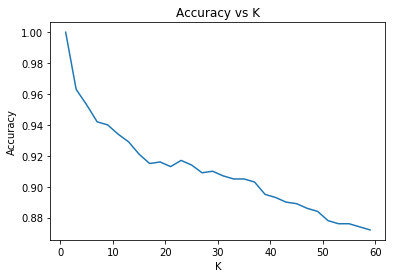

In [53]:
#Grafico la precisión vs el valor de K
plt.plot(kVals, accuracies)
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.title('Accuracy vs K')
plt.show()

In [54]:
# Podemos probar con K=7
model = KNeighborsClassifier(n_neighbors=7)
model.fit(trainData, trainLabels)

predictions = model.predict(testData)

print("Accuracy para el set de Test: %.2f%%" % (100 * accuracy_score(testLabels, predictions)))


Accuracy para el set de Test: 90.70%


La predicción para este dígito es: [4]


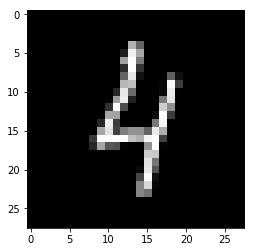

La predicción para este dígito es: [1]


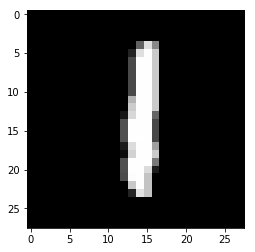

La predicción para este dígito es: [2]


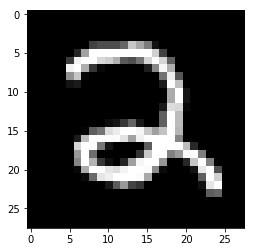

La predicción para este dígito es: [4]


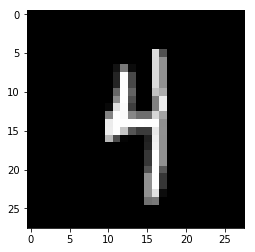

La predicción para este dígito es: [8]


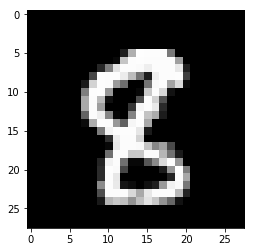

In [55]:
#  Probamos la clasificación con algunas imagenes de ejemplo
# La idea es agarrar algunas imagenes random, clasificarlas y ver si la clasificacion es correcta o no
for i in np.random.randint(0, high=len(testLabels), size=(5,)):
    image = testData[i]
    prediction = model.predict([image])

    print("La predicción para este dígito es: {}".format(prediction))

    pixels = np.array(image, dtype='float32')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28, 28))

    # Plot
    plt.imshow(pixels, cmap='gray')
    plt.show()
